## 1. Imports

In [1]:
import pandas as pd
import src.vis as vis
import src.preproc as preproc
import src.cluster as cluster

In [2]:
data = pd.read_csv('NOVAIMS_projectData_B2C_202526.csv')

## 2. Data Exploration

### 2.1. Indicators and Visualizations

In [3]:
data.head()

,ID_Client,Frequency_items,Potencial_Score,ZIP_Code,Longevity_months,Latitude,Longitude,Credit_factor,Relevance_criteria,Store_state,...,Meat,Dairy,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines
0,10156431SEG17NKID781,38,-0.400000,0,23,0.000000,-1.666667,0.7,Priority,NSW,...,59,"88,000",148,150.0,105,27,24,27.0,10,0
1,9056576FIA11NKID679,50,-0.300000,0,24,0.200000,0.000000,0.7,Priority,NSW,...,7,"90,000",134,26.0,20,31,-12,2.0,18,2
2,9253304IST6NKID248,48,1.600000,0,32,0.428571,1.000000,0.7,Priority,NSW,...,0,"89,000",39,-6.0,25,32,17,33.0,26,-13
3,9661067PER12NKID393,46,-0.900000,0,-4,-0.400000,-0.500000,4.5,Priority,NSW,...,0,"89,000",26,66.0,16,29,31,28.0,-2,8
4,9956825FEG11NKID326,31,31.607792,8,10,1.000000,0.714286,0.7,Priority,NSW,...,0,"90,000",-2,57.0,27,45,46,19.0,23,9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123683 entries, 0 to 123682
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Client               123354 non-null  object 
 1   Frequency_items         123683 non-null  int64  
 2   Potencial_Score         123683 non-null  float64
 3   ZIP_Code                123089 non-null  object 
 4   Longevity_months        123683 non-null  int64  
 5   Latitude                123683 non-null  float64
 6   Longitude               123683 non-null  float64
 7   Credit_factor           123683 non-null  float64
 8   Relevance_criteria      123683 non-null  object 
 9   Store_state             123683 non-null  object 
 10  Recency_in_weeks        123683 non-null  int64  
 11  Returns                 123683 non-null  int64  
 12  ID_Store_last           123683 non-null  int64  
 13  Gender                  42566 non-null   object 
 14  Flaged              

In [5]:
data.describe()

,Frequency_items,Potencial_Score,Longevity_months,Latitude,Longitude,Credit_factor,Recency_in_weeks,Returns,ID_Store_last,Flaged,...,Bread,Meat,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines
count,123683.000000,123683.000000,123683.000000,123683.000000,123683.000000,123683.000000,123683.000000,123683.000000,123683.0,123683.000000,...,123683.000000,123683.000000,123683.000000,123057.000000,123683.000000,123683.000000,123683.000000,123683.000000,123683.000000,123683.000000
mean,38.261224,30.392316,13.665354,25.249363,6.158188,0.899913,11.244706,4.310972,1.0,0.010373,...,29.886233,4.413606,62.666826,74.222564,49.562155,51.366865,36.884891,19.181545,23.499664,16.204216
std,13.594001,99.673585,9.881178,29.997630,7.697199,0.799920,3.799946,27.629597,0.0,0.101639,...,74.543595,65.663578,142.515009,135.669123,78.762338,52.097284,97.267381,18.939219,167.137181,59.304674
min,1.000000,-1.000000,-12.000000,-5.000000,-5.000000,0.000000,-4.000000,-87.000000,1.0,0.000000,...,-49.000000,-53.000000,-33.000000,-35.000000,-17.000000,0.000000,-954.000000,-24.000000,-45.000000,-85.000000
25%,29.000000,0.800000,6.000000,-0.166667,-0.166667,0.700000,9.000000,0.000000,1.0,0.000000,...,25.000000,0.000000,28.000000,30.000000,17.000000,28.000000,12.000000,9.000000,7.000000,4.000000
50%,37.000000,24.058840,13.000000,1.000000,1.000000,0.700000,11.000000,0.000000,1.0,0.000000,...,29.000000,0.000000,45.000000,60.000000,28.000000,32.000000,32.000000,19.000000,18.000000,13.000000
75%,47.000000,39.701604,21.000000,60.126211,13.971501,1.000000,14.000000,0.000000,1.0,0.000000,...,32.000000,0.000000,100.000000,109.000000,90.000000,47.000000,52.000000,27.000000,30.000000,23.000000
max,131.000000,11481.040830,45.000000,72.170287,30.973885,28.400000,18.000000,591.000000,1.0,2.000000,...,8546.000000,6771.000000,23100.000000,12806.000000,9828.000000,3592.000000,5981.000000,1612.000000,28375.000000,9621.000000


In [6]:
data.describe(include='object')

,ID_Client,ZIP_Code,Relevance_criteria,Store_state,Gender,Education,Dairy
count,123354,123089,123683,123683,42566,71833,123683
unique,122803,9,3,1,7,6,426
top,,8,Priority,NSW,male,High School,"30,000"
freq,288,67808,115847,123683,12408,26510,9674


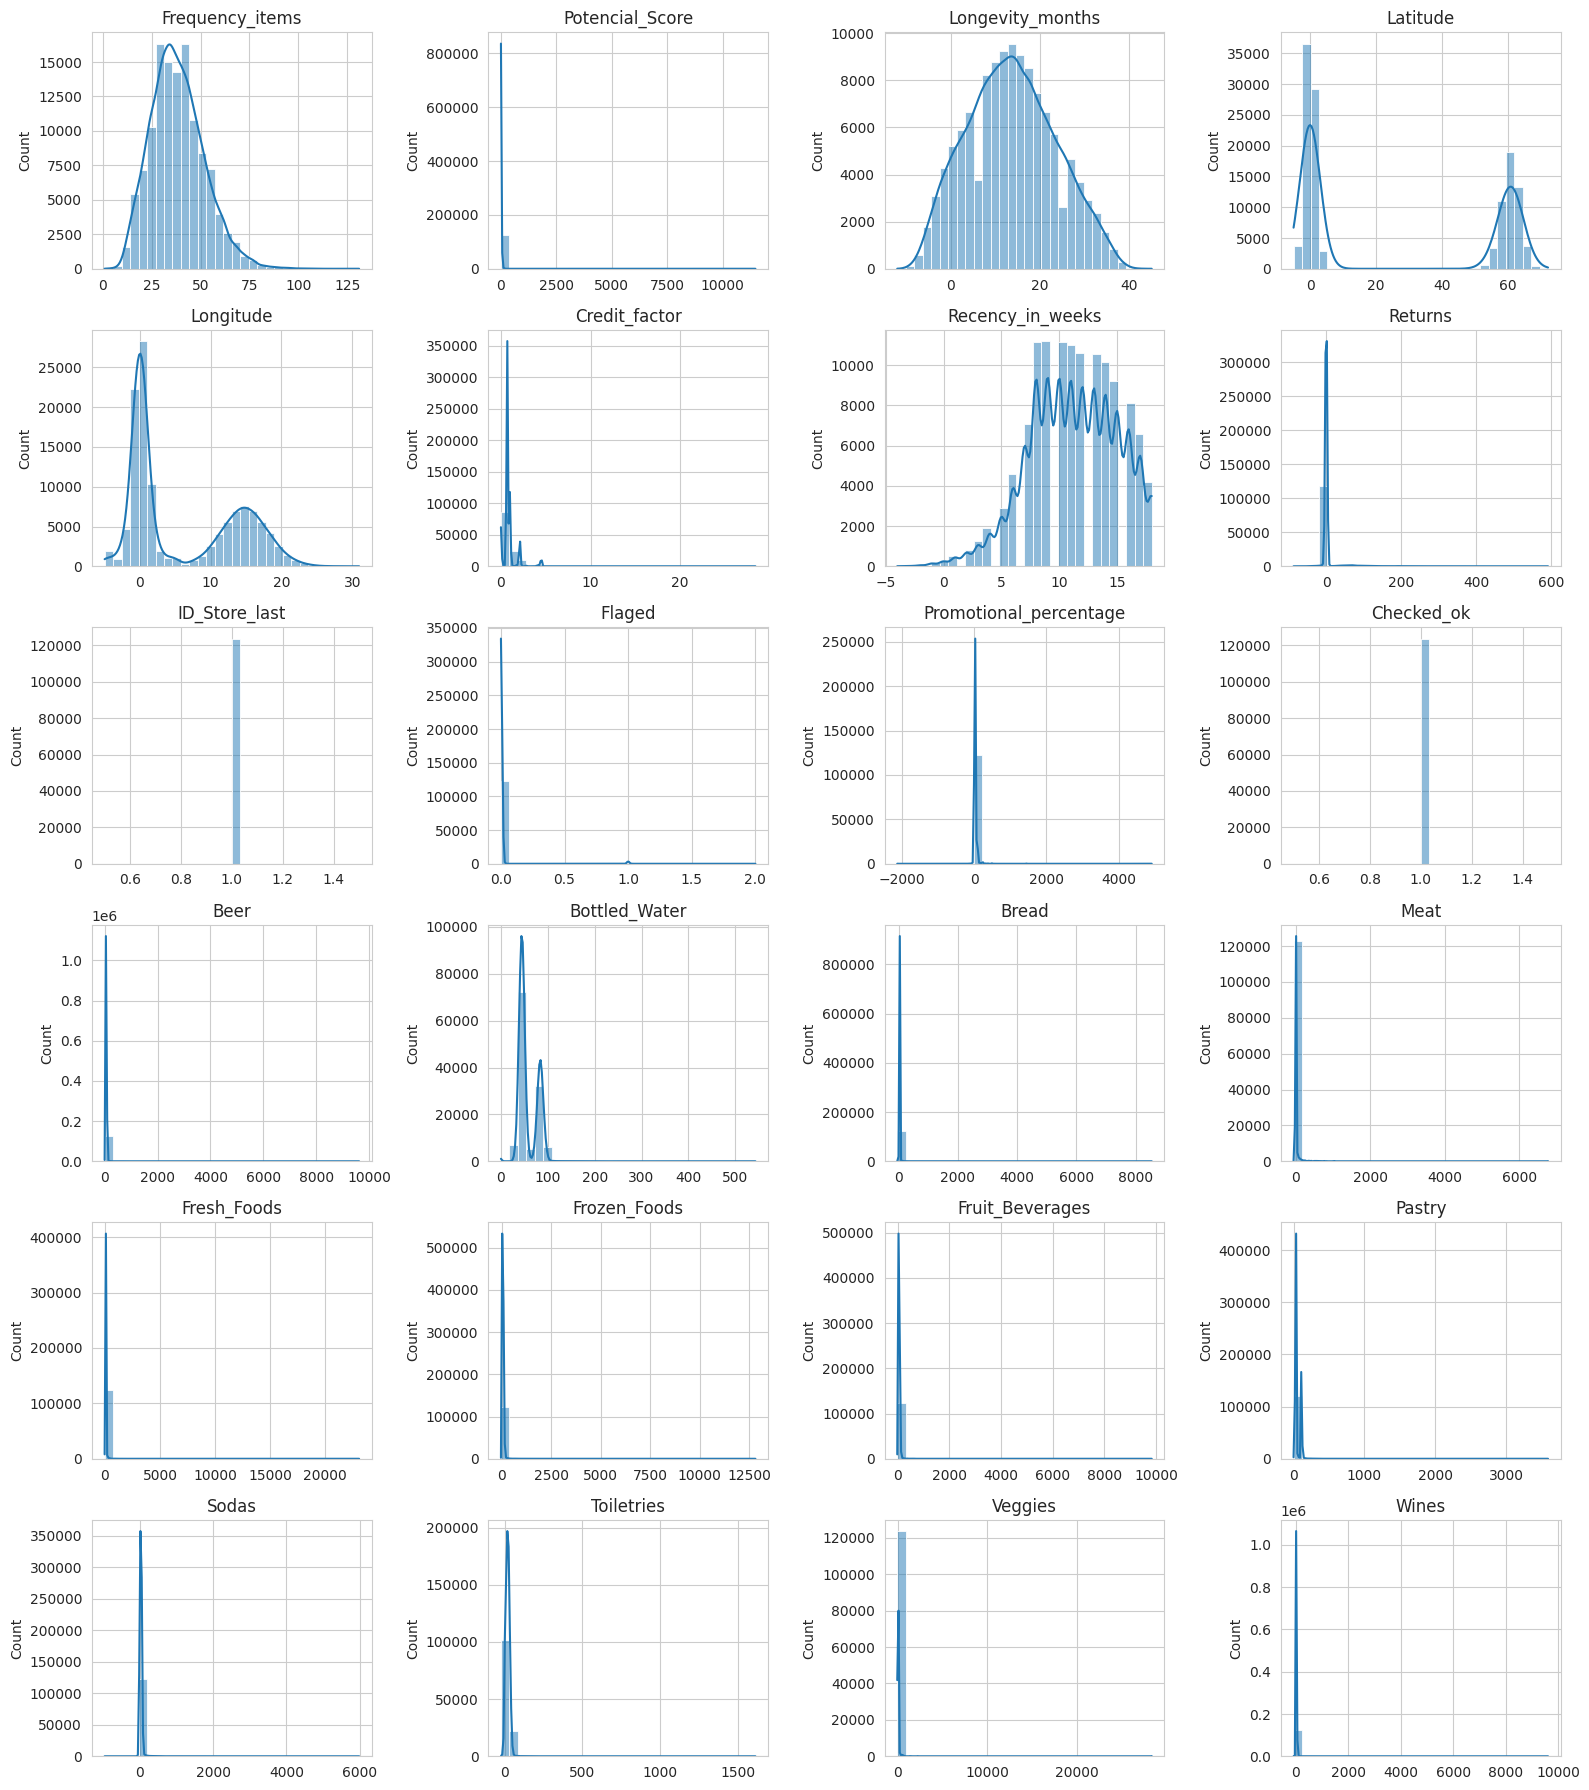

In [7]:
vis.plot_numeric_distributions(data)

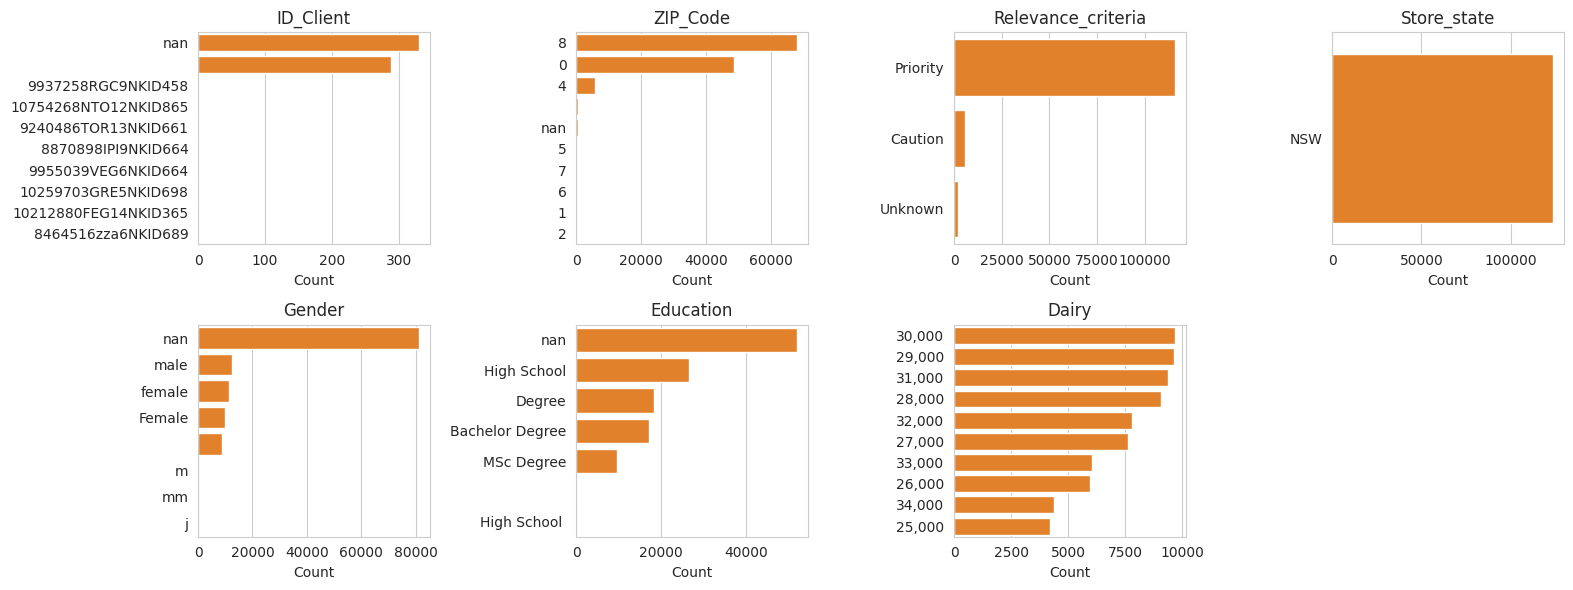

In [8]:
vis.plot_categorical_value_counts(data)

### 2.2. Investigation

In [9]:
# Checking missing values
missing = data.isnull().sum()
pct = missing / len(data) * 100
pd.concat([missing, pct], axis=1, keys=['missing', 'pct']).loc[missing > 0].sort_values('pct', ascending=False)

,missing,pct
Gender,81117,65.584599
Education,51850,41.921687
Frozen_Foods,626,0.506133
ZIP_Code,594,0.480260
ID_Client,329,0.266003


In [14]:
# Checking columns with negative values
cols_to_check = ['Longevity_months', 'Credit_factor','Recency_in_weeks', 'Returns', 'Promotional_percentage', 'Sodas'] 
for col in cols_to_check:
    neg_pct = (data[col] < 0).mean() * 100
    print(f"Percentage of negative values in {col}: {neg_pct:.2f}%")

Percentage of negative values in Longevity_months: 7.95%
Percentage of negative values in Credit_factor: 0.00%
Percentage of negative values in Recency_in_weeks: 0.20%
Percentage of negative values in Returns: 1.67%
Percentage of negative values in Promotional_percentage: 1.17%
Percentage of negative values in Sodas: 11.70%


In [15]:
# Checking errors in Potencial_Score
pct_above_100 = (data['Potencial_Score'] > 100).mean() * 100
print(f"Percentage of values in Potencial_Score above 100: {pct_above_100:.2f}%")

Percentage of values in Potencial_Score above 100: 0.68%


In [ ]:
# Checking distribution of Returns
pct_zero = (data['Returns'] == 0).mean() * 100
print(f"Percentage of values in Returns equal to 0: {pct_zero:.2f}%")

Percentage of values in Returns equal to 0: 93.87%


In [18]:
# Checking distribution of ID_Store_last
data['ID_Store_last'].value_counts(dropna=False)

ID_Store_last
1    123683
Name: count, dtype: int64

In [20]:
# Checking distribution of Flaged
data['Flaged'].value_counts(dropna=False)

Flaged
0    122404
1      1275
2         4
Name: count, dtype: int64

In [22]:
# Checking for errors in Promotional_percentage
pct_below_0 = (data['Promotional_percentage'] < 0).mean() * 100
pct_above_100 = (data['Promotional_percentage'] > 100).mean() * 100

print(f"Percentage of rows with Promotional_percentage below 0: {pct_below_0:.2f}%")
print(f"Percentage of rows with Promotional_percentage above 100: {pct_above_100:.2f}%")

Percentage of rows with Promotional_percentage below 0: 1.17%
Percentage of rows with Promotional_percentage above 100: 1.16%


### 2.3. Key Insights
- The dataset includes data for 73053 unique customers.

#### Feature Selection
- ZIP_Code has the same information as Latitude and Longitude. As ZIP_Code is the simpler variable and with more use (e.g. mailing promotions to a specific area) I will keep this variable.
- Checked_ok is merely an operational indicator, it brings no information on the customer, so I will delete it.

#### Missing Values
- ID_Client has 0.2% missing values so I will drop these rows.
- Gender would need to be edited to include only M/F. However, this column has 65% of missing values. We could try imputing these but dropping the variable is the best option.
- ZIP_Code has 0.4% missing values so I will drop these rows.
- In Education, I will assume the missing values mean education lower than a High School degree.
- The missing values in Frozen_Foods 

#### Preprocessing needed
- I will replace the Education variable with a EduYears column, transforming the categories into numeric values for years of education (assuming "Degree" is a Bachelor's Degree). This will allow me to use distance-based algorithms more efficiently.
- Promotional_percentage, the % of items bought on sale, cannot be negative. I will assume these were mistakes and will make them positive instead.


## 3. Data Preprocessing

## 4. Clustering

### 4.1. Value Segmentation

### 4.2. Buying Behaviour Segmentation

## 5. Cluster Analysis